# Time series forecasting project

In [2]:
# Handle imports up-front
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from pmdarima import auto_arima

## 1. Data loading

### 1.1. Load

In [3]:
raw_data_df=sns.load_dataset('flights')

### 1.2. Inspect 

In [4]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### 1.3. Encode date feature

Pandas has many great tools to work with timeseries data - see the user guide article: '*[Time series / date functionality](https://pandas.pydata.org/docs/user_guide/timeseries.html)*'. First thing to do is convert our string date feature(s) to a Datetime object.

In [5]:
# Make a copy of the raw data to work with
timeseries_df=raw_data_df.copy()

# Extract the string month to a datetime object feature
timeseries_df['month']=pd.to_datetime(raw_data_df.month, format='%b').dt.month

# Use the month and year to create at 'date' datetime feature
timeseries_df['date']=pd.to_datetime(timeseries_df[['year', 'month']].assign(day=1))

# Set the datetime feature as the index
timeseries_df=timeseries_df.set_index('date')

# Keep only the passenger column
timeseries_df.drop(['year', 'month'], axis=1, inplace=True)

# Re-name 'passengers' to 'dependent_var' so we can easily swap datasets without making
# changes to the notebook
timeseries_df.rename(columns={'passengers': 'dependent_var'}, inplace=True)

# Check the result
timeseries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   dependent_var  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## 2. EDA

### 2.1. Baseline model performance

Let's set a quick performance baseline using a quick/easy linear regression model and a 'carry forward' model.

#### 2.1.1. Linear model baseline

Linear Regression RMSE: 45.74


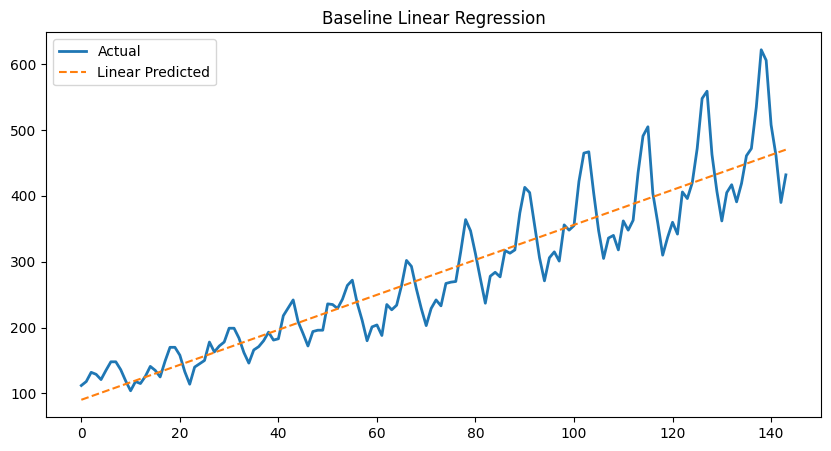

In [6]:
# Your code here! Hint use a numeric range equal to the length of the dataset for x.
# Create a simple numeric x range 
X = np.arange(len(timeseries_df)).reshape(-1, 1)
y = timeseries_df['dependent_var'].values

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Make predictions
y_pred = lr.predict(X)

# Evaluate model performance
rmse = sqrt(mean_squared_error(y, y_pred))
print(f"Linear Regression RMSE: {rmse:.2f}")

# Optional: Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y, label='Actual', linewidth=2)
plt.plot(y_pred, label='Linear Predicted', linestyle='--')
plt.title("Baseline Linear Regression")
plt.legend()
plt.show()


#### 2.1.2. 'Carry forward' baseline

The 'carry forward' baseline uses the precding value as the prediction for the next. How does it do?

Carry Forward RMSE: 33.71


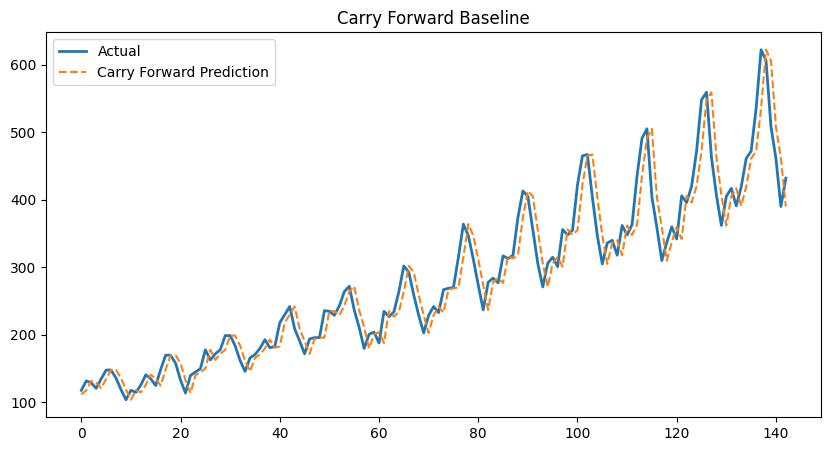

In [7]:
# Your code here - hint try making a copy of the data and shifting it by one point.
# Make a copy of the data
data_copy = timeseries_df.copy()

# Create a new column where each value is the previous value of 'dependent_var'
data_copy['prediction'] = data_copy['dependent_var'].shift(1)

# Drop the first row (it will have NaN in prediction)
data_copy.dropna(inplace=True)

# Evaluate the carry forward model using RMSE
rmse_cf = sqrt(mean_squared_error(data_copy['dependent_var'], data_copy['prediction']))
print(f"Carry Forward RMSE: {rmse_cf:.2f}")

# Optional: Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(data_copy['dependent_var'].values, label='Actual', linewidth=2)
plt.plot(data_copy['prediction'].values, label='Carry Forward Prediction', linestyle='--')
plt.title("Carry Forward Baseline")
plt.legend()
plt.show()


### 2.2. Missing, and/or extreme values

In [ ]:
# Plot data as a histogram as you normally would for any numerical data


### 2.3. Timeseries analysis

Let's now take a look at the data as a timeseries. There are a couple of things to look out for here.

1. Is the time axis regular? are the rows evenly spaced in time?
2. Is the data stationary? is there a consistent trend over time?
3. Are there regular or cyclical trends?

### 2.3.1. Plot the time-series

Let's include predictions from the baseline model too and see what we are working with.

In [ ]:
# Plot the data over time and include the linear regression from above


### 2.3.2. Missing timepoints

Next, do a quick check to see if the datetime index we just created is evenly spaced - i.e. the time delta between the rows is always the same.

In [ ]:
# Your code here. Hint: take a look and Panda's .resample() and numpy's .diff()


### 2.3.3. Stationarity

In [ ]:
# Note: you want to be aware of this property of your data, but you may or may not have to do anything with this information right away!
# Use the adfuller() test from statsmodels.tsa.stattools

### 2.3.4. Seasonality

In [ ]:
# Note: you want to be aware of this property of your data, but you may or may not have to do anything with this information right away!


## 3. Model training

In [ ]:
# Hint use the 'auto_arima()' function from pmdarima as described in the reading on 4Geeks.


## 4. Model evaluation

In [1]:
# Plot the forecast for a small number of future points with .predict() on your ARIMA model. Also plot
# the input time series on the same plot


In [ ]:
# Try plotting predicting farther into the future - do the predictions still look as good?


The results might *look* convincing, at least if you don't look too closely - but how well are we actually doing? We need to implement train-test splitting and/or cross-validation to estimate the actual performance on unseen data!

Breaking up time-series data is a little bit harder than other types of tabular data - we can't just randomly select data points for the training and/or validation sets because the order matters!

Luckily, Scikit-learn can help us out here - take a look at [TimeSeriesSplit](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).

In [ ]:
# Implement test-train splitting and cross-validation using time-series split to properly evaluate the model.
